In [8]:
# Standard imports for building linear regression model
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

The function below, make_plot_model, generates a simple linear regression model using the historical smoke metric data, then plots the predicted smoke estimates for the year range given (start_year - end_year). It includes a 95% confidence interval. 

This function also includes a line to only include fires within 650 miles. This is to adhere to the guidelines of the assignment.

In [9]:
def make_plot_model(df, city_name, start_hist_year, start_pred_year, end_pred_year):
    """
    Takes in a dataframe containing information about wildfires, dataframe containing AQI information for given city,
    also takes in the city name, the end of the season date, and a "smoke_scale_factor" described above.

    Parameters:
        - df: Dataframe with wildfire information
        - city_name: Name of city
        - start_hist_year: The year the wildfire data starts at
        - start_pred_year: The year to start predicting the smoke estimate
        - end_pred_year: The year to end predicting the smoke estimate

    Returns a plot showing the historical smoke estimate, 
    and then showing the predicted smoke estimate. Also shows a 95% confidence interval
    """

    df = df[(df[f"average_distance_from_{city_name}"] <= 650)].copy()
    # Step 1: Aggregate the historical data by Fire_Year
    historical_data = df.groupby("Fire_Year")["smoke_impact"].sum().reset_index()

    # Step 2: Prepare the data for modeling
    X = historical_data["Fire_Year"]
    y = historical_data["smoke_impact"]

    # Adding a constant for the intercept
    X = sm.add_constant(X)

    # Step 3: Fit a linear regression model
    model = sm.OLS(y, X).fit()

    # Step 4: Create a future DataFrame for prediction
    future_years = pd.DataFrame({"Fire_Year": np.arange(start_pred_year, end_pred_year+1)})
    future_X = sm.add_constant(future_years)

    # Step 5: Predict future smoke impact
    predictions = model.predict(future_X)

    # Calculate confidence intervals
    predictions_summary_frame = model.get_prediction(future_X).summary_frame(alpha=0.05)  # 95% CI

    # Step 6: Plot the historical and predicted values
    plt.figure(figsize=(12, 6))

    # Historical Data
    plt.plot(historical_data["Fire_Year"], historical_data["smoke_impact"], marker='o', label='Historical Smoke Impact', color='b')

    # Predicted Data
    plt.plot(future_years["Fire_Year"], predictions, marker='o', label='Predicted Smoke Impact', color='orange')

    # Confidence Intervals
    plt.fill_between(future_years["Fire_Year"],
                    predictions_summary_frame['obs_ci_lower'],
                    predictions_summary_frame['obs_ci_upper'],
                    color='gray', alpha=0.5, label='95% Confidence Interval')

    # Add labels and title
    plt.title('Historical and Predicted Smoke Impact (1961 - 2046)')
    plt.xlabel('Year')
    plt.ylabel('Total Smoke Impact')
    plt.xticks(np.arange(start_hist_year, end_pred_year+4, 5))
    plt.legend()

    # Show grid for better readability
    plt.grid()

    # Display the plot
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()


The cell below loads in the wildfire data from its save location

In [10]:
wildfire_data = pd.read_csv("data/wildfire_processed.csv", index_col=0)

C:\Users\PC\AppData\Local\Temp\ipykernel_2940\2371959801.py:1: DtypeWarning: Columns (14,21,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  wildfire_data = pd.read_csv("data/wildfire_processed.csv", index_col=0)


The cell below returns a plot showing the historical smoke impact and the predicted smoke impact. Obviously model choice has a huge impact on the predicted scores. I chose to use a simple linear regression. Because of all the assumptions made and the variance present, I figured it was futile to make more precise estimates. I aim to draw at least a simple conclusion - the amount of smoke is likely increaseing. 

With that being said though, because the data is so volatile - the 95% confidence interval is incredibly large. Therefore it's highly likely there isn't a year over year pattern that can be gleaned from the data and from my chosen metric.

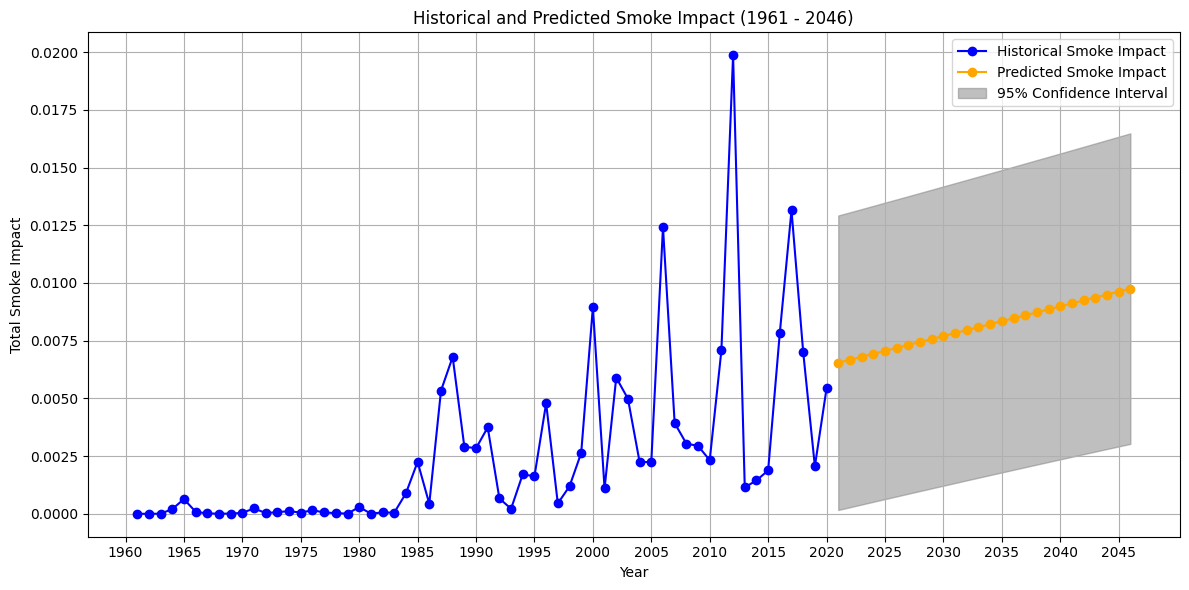

In [11]:
make_plot_model(wildfire_data, city_name="Sioux_Falls", start_hist_year=1960, start_pred_year=2021, end_pred_year=2046)